# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cityweather.csv"

# URL
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set count for city #
count_one = 0
set_one = 1

# loops for city data
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Not Found")

Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found
Not Found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
weather_cols = {
    "City":city_two,
    "Cloudy":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Long":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [ ]:
cityweather_df = pd.DataFrame(weather_cols)
cityweather_df
cityweather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
plt.scatter(cityweather_df["Lat"],cityweather_df["Max Temp"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("CityLatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

In [ ]:
plt.scatter(cityweather_df["Lat"],cityweather_df["Humidity"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("CityLatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

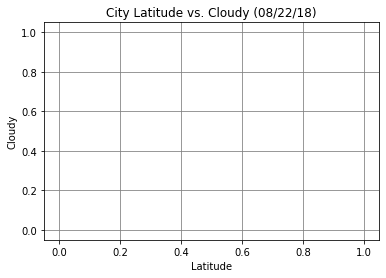

In [41]:
plt.scatter(cityweather_df["Lat"],cityweather_df["Cloudy"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Cloudy (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("CityLatvsCloudy.png")
plt.show()

#### Latitude vs. Wind Speed Plot

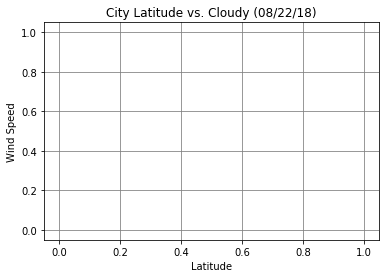

In [42]:
plt.scatter(cityweather_df["Lat"],cityweather_df["Wind Speed"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Cloudy (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("CityLatvsWind.png")
plt.show()

In [43]:
# Observations:

1 - In the dataset observed there seems to be longitudinal relationship (horizontal and linear)
in the amount of clouds around 0 and 79.

2 - Wind speeds in the sample data ranges between 0 and 20 with only a few outliers outside of this range

3 - Out of the 606 cities randomly generated by the data only 273 could be matched in the API

SyntaxError: invalid syntax (<ipython-input-43-842598a4a5ae>, line 1)